# 🚕 Project Idea: NYC Taxi Trip Duration Analysis


[Data Set](https://www.kaggle.com/datasets/yasserh/nyc-taxi-trip-duration)


# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("NYC.csv")

# Convert pickup_datetime to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Q1. What is the average and median trip duration?

In [2]:
avg_duration = np.mean(df['trip_duration']/60)   # in minutes
median_duration = np.median(df['trip_duration']/60)

print("Average Duration:", round(avg_duration,2), "minutes")
print("Median Duration:", round(median_duration,2), "minutes")


Average Duration: 15.99 minutes
Median Duration: 11.03 minutes


# Which pickup hours have the most trips?

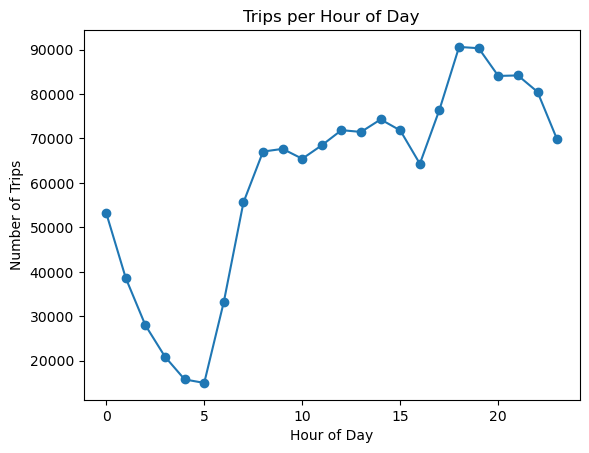

18

In [3]:
df['hour'] = df['pickup_datetime'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour of Day")
plt.show()

hourly_counts.idxmax()


In [4]:
hourly_counts

hour
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: count, dtype: int64

# Which day of the week has the longest average trip duration?

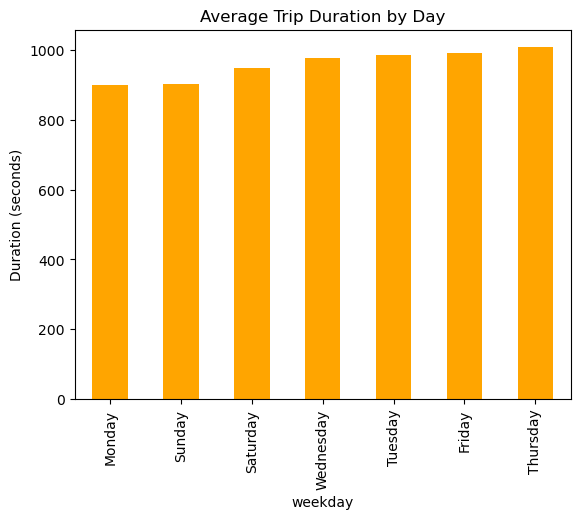

'Thursday'

In [7]:
df['weekday'] = df['pickup_datetime'].dt.day_name()
weekday_avg = df.groupby('weekday')['trip_duration'].mean().sort_values()

weekday_avg.plot(kind='bar', color='orange')
plt.title("Average Trip Duration by Day")
plt.ylabel("Duration (seconds)")
plt.show()

weekday_avg.idxmax()


# Are weekends busier than weekdays?

In [8]:
weekend = df[df['weekday'].isin(['Saturday','Sunday'])]
weekday = df[~df['weekday'].isin(['Saturday','Sunday'])]

print("Average trips on weekends:", len(weekend)/2)   # 2 weekend days
print("Average trips on weekdays:", len(weekday)/5)   # 5 weekdays


Average trips on weekends: 208117.0
Average trips on weekdays: 208482.0


# Outlier Trips (long duration but short distance)?

In [10]:
outliers = df[(df['distance_km'] < 2) & (df['trip_duration'] > 7200)]  # <2 km but >2 hrs
print("Number of suspicious trips:", len(outliers))
outliers.head()


Number of suspicious trips: 915


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,weekday,distance_km
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149,18,Saturday,1.176094
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236,0,Saturday,1.859416
4336,id3632390,2,2016-06-08 08:54:33,2016-06-09 07:58:09,5,-73.980560,40.742466,-73.984718,40.748611,N,83016,8,Wednesday,0.767894
5104,id3354426,2,2016-05-05 15:18:41,2016-05-06 15:11:07,1,-73.989037,40.773514,-73.980682,40.781521,N,85946,15,Thursday,1.134700
5778,id0773526,2,2016-04-02 14:58:45,2016-04-03 14:19:55,6,-73.987991,40.761341,-74.002922,40.756279,N,84070,14,Saturday,1.377784


# Which pickup locations (boroughs) have the highest number of trips?

In [11]:
# Rough clustering by rounding coordinates
df['pickup_lat_bin'] = df['pickup_latitude'].round(2)
df['pickup_lon_bin'] = df['pickup_longitude'].round(2)

pickup_counts = df.groupby(['pickup_lat_bin','pickup_lon_bin']).size().reset_index(name='count')
top_locations = pickup_counts.sort_values(by='count', ascending=False).head(10)
print(top_locations)


     pickup_lat_bin  pickup_lon_bin  count
624           40.76          -73.97  90199
583           40.75          -73.99  90071
623           40.76          -73.98  77753
584           40.75          -73.98  72644
541           40.74          -73.99  65807
622           40.76          -73.99  65702
663           40.77          -73.96  51425
495           40.73          -73.99  51173
661           40.77          -73.98  47712
494           40.73          -74.00  44375


# Q9. Which drop-off locations are most common?

In [12]:
df['drop_lat_bin'] = df['dropoff_latitude'].round(2)
df['drop_lon_bin'] = df['dropoff_longitude'].round(2)

drop_counts = df.groupby(['drop_lat_bin','drop_lon_bin']).size().reset_index(name='count')
top_drop_locations = drop_counts.sort_values(by='count', ascending=False).head(10)
print(top_drop_locations)


      drop_lat_bin  drop_lon_bin  count
1049         40.76        -73.98  78128
1050         40.76        -73.97  77172
987          40.75        -73.99  74716
988          40.75        -73.98  69981
926          40.74        -73.99  55147
1048         40.76        -73.99  52749
1115         40.77        -73.96  51085
869          40.73        -73.99  40952
927          40.74        -73.98  40493
1113         40.77        -73.98  39026


# Q10. What is the busiest month of the year?

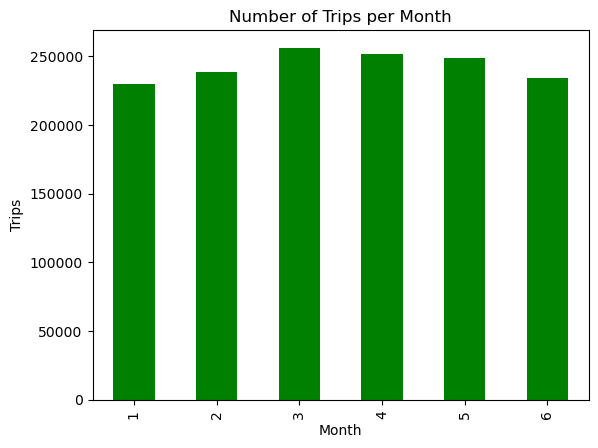

3

In [13]:
df['month'] = df['pickup_datetime'].dt.month
month_counts = df['month'].value_counts().sort_index()

month_counts.plot(kind='bar', color='green')
plt.title("Number of Trips per Month")
plt.xlabel("Month")
plt.ylabel("Trips")
plt.show()

month_counts.idxmax()


In [ ]:
Average speed of taxis (km/h)?

Average Taxi Speed (km/h): 14.42


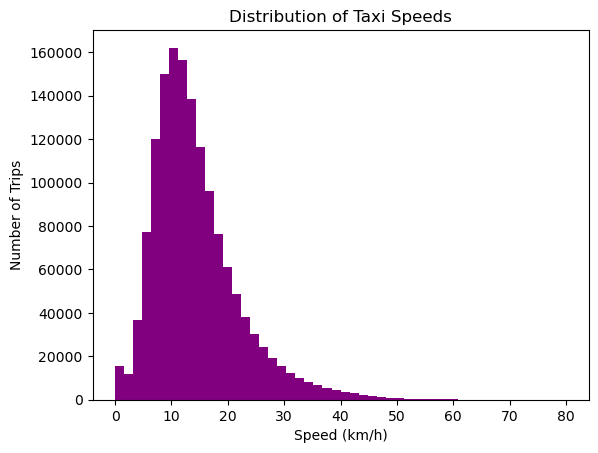

In [14]:
df['duration_hours'] = df['trip_duration'] / 3600
df['speed_kmh'] = df['distance_km'] / df['duration_hours']

print("Average Taxi Speed (km/h):", round(df['speed_kmh'].mean(),2))

plt.hist(df['speed_kmh'], bins=50, range=(0,80), color='purple')
plt.xlabel("Speed (km/h)")
plt.ylabel("Number of Trips")
plt.title("Distribution of Taxi Speeds")
plt.show()


In [ ]:
Which vendor provides faster trips on average?

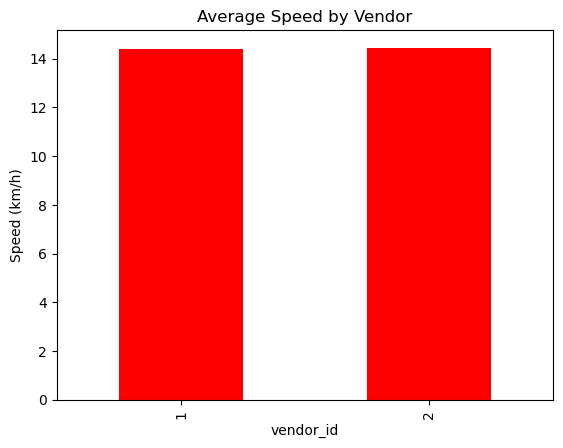

In [15]:
vendor_speed = df.groupby('vendor_id')['speed_kmh'].mean()
vendor_speed.plot(kind='bar', color='red')
plt.title("Average Speed by Vendor")
plt.ylabel("Speed (km/h)")
plt.show()


In [ ]:
Q13. Do trips at night (12 AM–6 AM) take less time than daytime?

In [16]:
df['is_night'] = df['hour'].apply(lambda x: 1 if 0 <= x < 6 else 0)
night_avg = df[df['is_night']==1]['trip_duration'].mean()/60
day_avg = df[df['is_night']==0]['trip_duration'].mean()/60

print("Avg Night Trip (minutes):", round(night_avg,2))
print("Avg Day Trip (minutes):", round(day_avg,2))


Avg Night Trip (minutes): 15.07
Avg Day Trip (minutes): 16.11


In [ ]:
Q14. What is the longest recorded taxi trip?

In [17]:
longest_trip = df.loc[df['trip_duration'].idxmax()]
print("Longest trip duration (hours):", round(longest_trip['trip_duration']/3600,2))
print("Distance:", round(longest_trip['distance_km'],2), "km")


Longest trip duration (hours): 979.52
Distance: 19.9 km


In [ ]:
Q15. How does trip duration vary by passenger count?

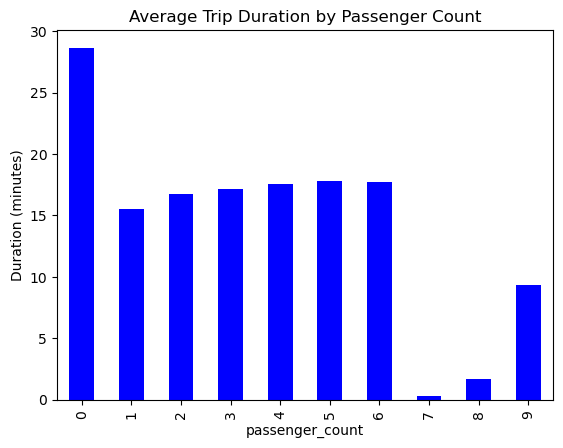

In [18]:
passenger_avg = df.groupby('passenger_count')['trip_duration'].mean()/60
passenger_avg.plot(kind='bar', color='blue')
plt.title("Average Trip Duration by Passenger Count")
plt.ylabel("Duration (minutes)")
plt.show()
